In [2]:
import requests
import pandas as pd
import json
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)
#test change

In [111]:
#get=GEO_ID,NAME,EMP,NATION,PAYANN,STATE,YEAR
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
#removed non labled versions of rows
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
stateurl = url = f"https://api.census.gov/data/2018/abscs?get={get}&for=state:*&key={apikey}"

r = requests.get(url)
print(r)
stater = requests.get(stateurl)
print(stater)

r = r.json()
r = json.dumps(r)

stater = stater.json()
stater = json.dumps(stater)

<Response [200]>
<Response [200]>


In [112]:

p = pd.read_json(r)
p.head(10)

headers = p.iloc[0]
new_p  = pd.DataFrame(p.values[1:], columns=headers)
#remove columns we don't need
new_p = new_p.drop(columns =['SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F'])


In [146]:

statedatap = pd.read_json(stater)
statedatap.head(10)

headers = statedatap.iloc[0]
statedata  = pd.DataFrame(statedatap.values[1:], columns=headers)
#remove columns we don't need
statedata = statedata.drop(columns =['ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F'])
statedata

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,...,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,EMP_S_F,PAYANN_S,state
0,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 1 to 4 employees,...,0,g,0,S,0.0,0.0,0.0,S,0.0,28
1,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 5 to 9 employees,...,1742,None,43830,None,44.0,0.0,44.5,None,43.5,28
2,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 10 to 19 employees,...,0,g,0,D,0.0,0.0,0.0,D,0.0,28
3,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 20 to 49 employees,...,0,c,0,D,0.0,0.0,0.0,D,0.0,28
4,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 50 to 99 employees,...,0,h,0,D,0.0,0.0,0.0,D,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261392,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,All firms,...,820,None,55388,None,96.6,0.0,30.4,None,22.7,27
261393,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,Firms with no employees,...,0,a,0,D,0.0,0.0,0.0,D,0.0,27
261394,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,Firms with 50 to 99 employees,...,0,b,0,D,0.0,0.0,0.0,D,0.0,27
261395,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,Firms with 100 to 249 employees,...,0,c,0,D,0.0,0.0,0.0,D,0.0,27


In [110]:
new_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19458 entries, 0 to 19457
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GEO_ID            19458 non-null  object
 1   NAME              19458 non-null  object
 2   NAICS2017         19458 non-null  object
 3   NAICS2017_LABEL   19458 non-null  object
 4   SEX_LABEL         19458 non-null  object
 5   ETH_GROUP_LABEL   19458 non-null  object
 6   RACE_GROUP_LABEL  19458 non-null  object
 7   VET_GROUP_LABEL   19458 non-null  object
 8   EMPSZFI_LABEL     19458 non-null  object
 9   FIRMPDEMP         19458 non-null  object
 10  FIRMPDEMP_F       7516 non-null   object
 11  RCPPDEMP          19458 non-null  object
 12  RCPPDEMP_F        18498 non-null  object
 13  EMP               19458 non-null  object
 14  EMP_F             7516 non-null   object
 15  PAYANN            19458 non-null  object
 16  PAYANN_F          7516 non-null   object
 17  FIRMPDEMP_S 

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

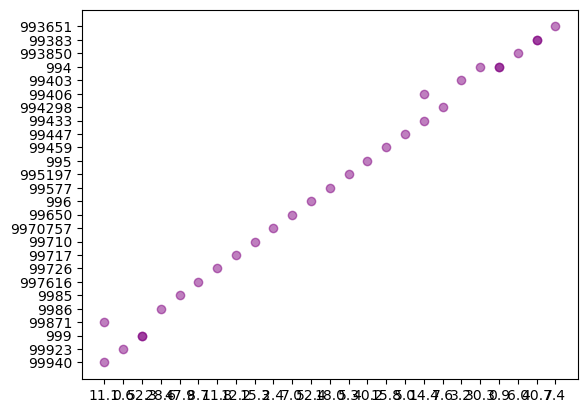

In [86]:
topemp = new_p[['EMP','EMP_S','PAYANN']].sort_values(by = 'EMP', ascending=False)[:30]
topemp[['EMP','EMP_S','PAYANN']]
plt.scatter(y = topemp['EMP'],  # x-axis data
            x = topemp['EMP_S'],    # y-axis data
            #marker = 'x',            # shape of point 
            alpha = .5,             # color scale to denote frequency (alpha = 1 <=> same color for everything)
            color = 'purple');

In [87]:
smalltest = new_p[['NAICS2017_LABEL',]]
smalltestagain = smalltest.groupby('NAICS2017_LABEL').size().reset_index(name='count')
smalltestagain.sort_values(by='count', ascending=False, inplace=True)

In [199]:
statecount = statedata[['NAME','FIRMPDEMP', 'NAICS2017_LABEL']]
statecount['FIRMPDEMP'] = statecount['FIRMPDEMP'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecount = statecount[(statecount['NAICS2017_LABEL']!='Total for all sectors')]
statecount = statecount.groupby(['NAME','NAICS2017_LABEL'], as_index=False)['FIRMPDEMP'].sum()

#statecount.sort_values(by='FIRMPDEMP', ascending=False, inplace=True)
statecount.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_23576\4032092475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecount['FIRMPDEMP'] = statecount['FIRMPDEMP'].astype('int')


,NAME,NAICS2017_LABEL,FIRMPDEMP
0,Alabama,Accommodation and food services,131495
1,Alabama,Administrative and support and waste managemen...,67407
2,Alabama,"Agriculture, forestry, fishing and hunting",3393
3,Alabama,"Arts, entertainment, and recreation",10398
4,Alabama,Construction,176337
...,...,...,...
95,California,Real estate and rental and leasing,1122824
96,California,Retail trade,1659332
97,California,Transportation and warehousing,509060
98,California,Utilities,2028


In [184]:
firmus = new_p[['FIRMPDEMP','SEX_LABEL']]
firmus['FIRMPDEMP'] = firmus['FIRMPDEMP'].astype('int')
firmus = firmus[(firmus['SEX_LABEL']=='Female')|(firmus['SEX_LABEL']=='Male')]
firmus = firmus.groupby(['SEX_LABEL'], as_index=False)['FIRMPDEMP'].sum()
firmus


C:\Users\Daniel\AppData\Local\Temp\ipykernel_23576\1973670799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firmus['FIRMPDEMP'] = firmus['FIRMPDEMP'].astype('int')


,SEX_LABEL,FIRMPDEMP
0,Female,22794065
1,Male,74856729


<BarContainer object of 21 artists>

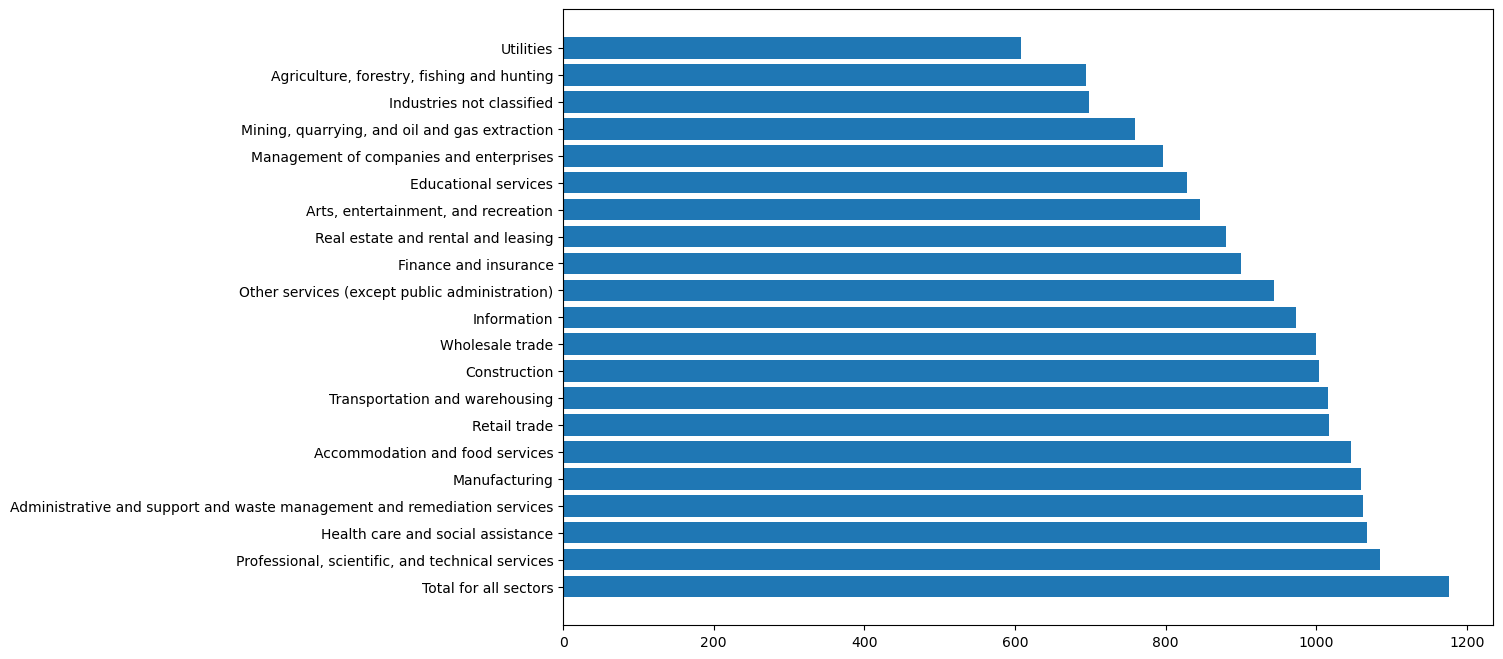

In [60]:
plt.figure(figsize = (12, 8))
#barplot
plt.barh(y = smalltestagain['NAICS2017_LABEL'], width = smalltestagain['count'])

In [134]:
smalltestp

""
NAICS2017_LABEL
Accommodation and food services
Administrative and support and waste management and remediation services
"Agriculture, forestry, fishing and hunting"
"Arts, entertainment, and recreation"
Construction
Educational services
Finance and insurance
Health care and social assistance
Industries not classified
